# Data Analysis

Now, we have the pixel from Pan-STARRS which the pixel where chosen used the mathc using the Viper and VVDF

In [3]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/zxcorr/zxcorr_DataAccess/main/DESzxcorr/pycode/astroFunctions.py -O astroFunctions.py
    ! pip install esutil
    ! pip install healpy
    import astroFunctions as astro
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/DESzxcorr/pycode/") # user here the path where we download the folder DESzxcoorr

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import astroFunctions as astro
import matplotlib
from astropy.table import Table,QTable
import astropy.io.fits as fits
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import os, sys
%matplotlib inline

**Important Functions**

In [5]:
def clean_tab(tab,col,val):
    tab.drop(tab[tab[col]==val].index,inplace = True)


Read table 1, for distance of 1 arc sec


In [6]:
if IN_COLAB:
    path1 = "/content/drive/Shareddrives/Optical Data/DES Data/results/match-PS1_VIPERS_VVDS-DE/00028"
    path2 = "/content/drive/Shareddrives/Optical Data/DES Data/results/match-PS1_VIPERS_VVDS-DE/00035"
    path3 = "/content/drive/Shareddrives/Optical Data/DES Data/results/match-PS1_VIPERS_VVDS-DE/00042"
    path4 = "/content/drive/Shareddrives/Optical Data/DES Data/results/match-PS1_VIPERS_VVDS-DE/00049"
    path5 = "/content/drive/Shareddrives/Optical Data/DES Data/results/match-PS1_VIPERS_VVDS-DE/00056"
    path6 = "/content/drive/Shareddrives/Optical Data/DES Data/results/match-PS1_VIPERS_VVDS-DE/00062"
    path7 = "/content/drive/Shareddrives/Optical Data/DES Data/results/match-PS1_VIPERS_VVDS-DE/00069"
    path8 = "/content/drive/Shareddrives/Optical Data/DES Data/results/match-PS1_VIPERS_VVDS-DE/00076"
else:
    path1 = home+"/DESzxcorr/results/match-PS1_VIPERS_VVDS-DE/00028"
    path2 = home+"/DESzxcorr/results/match-PS1_VIPERS_VVDS-DE/00035"
    path3 = home+"/DESzxcorr/results/match-PS1_VIPERS_VVDS-DE/00042"
    path4 = home+"/DESzxcorr/results/match-PS1_VIPERS_VVDS-DE/00049"
    path5 = home+"/DESzxcorr/results/match-PS1_VIPERS_VVDS-DE/00056"
    path6 = home+"/DESzxcorr/results/match-PS1_VIPERS_VVDS-DE/00062"
    path7 = home+"/DESzxcorr/results/match-PS1_VIPERS_VVDS-DE/00069"
    path8 = home+"/DESzxcorr/results/match-PS1_VIPERS_VVDS-DE/00076"


In [7]:
filename1 = os.listdir(path1)
filename2 = os.listdir(path2)
filename3 = os.listdir(path3)
filename4 = os.listdir(path4)
filename5 = os.listdir(path5)
filename6 = os.listdir(path6)
filename7 = os.listdir(path7)
filename8 = os.listdir(path8)


In [8]:
l1 = []
for i in range(len(filename1)): # if breaks, its the RAM so read less data.
    path_dir = os.path.join(path1,filename1[i])
    df = Table.read(path_dir).to_pandas()
    l1.append(df)
tab1 = pd.concat(l1, axis=0, ignore_index=True)
del df
del l1

l2 = []
for i in range(len(filename2)): # if breaks, its the RAM so read less data.
    path_dir = os.path.join(path2,filename2[i])
    df = Table.read(path_dir).to_pandas()
    l2.append(df)
tab2 = pd.concat(l2, axis=0, ignore_index=True)
del df 
del l2

l3 = []
for i in range(len(filename3)):
    path_dir = os.path.join(path3,filename3[i])
    df = Table.read(path_dir).to_pandas()
    l3.append(df)
tab3 = pd.concat(l3,axis = 0,ignore_index= True)
del df
del l3

l4 = []
for i in range(len(filename4)):
    path_dir = os.path.join(path4,filename4[i])
    df = Table.read(path_dir).to_pandas()
    l4.append(df)
tab4 = pd.concat(l4,axis = 0,ignore_index = True)
del df
del l4

l5 = []
for i in range(len(filename5)):
    path_dir = os.path.join(path5,filename5[i])
    df = Table.read(path_dir).to_pandas()
    l5.append(df)

tab5 = pd.concat(l5,axis = 0, ignore_index = True)
del df
del l5

l6 = []
for i in range(len(filename6)):
    path_dir = os.path.join(path6,filename6[i])
    df = Table.read(path_dir).to_pandas()
    l6.append(df)
tab6 = pd.concat(l6,axis = 0, ignore_index = True)
del l6
del df

l7 = []
for i in range(len(filename7)):
    path_dir = os.path.join(path7,filename7[i])
    df = Table.read(path_dir).to_pandas()
    l7.append(df)
tab7 = pd.concat(l7,axis = 0, ignore_index = True)
del l7
del df


l8 = []
for i in range(len(filename8)):
    path_dir = os.path.join(path8,filename8[i])
    df = Table.read(path_dir).to_pandas()
    l8.append(df)
tab8 = pd.concat(l8, axis=0, ignore_index=True)

del df
del l8

With the tables load, we now make our analysis.

# DES

Here is loaded the DES catalog to compare with the match

In [9]:
l = []
path_des = home+"/DESzxcorr/results/des"
filename = os.listdir(path_des)
for i in range(len(filename)):
    path_dir = os.path.join(path_des,filename[i])
    df = Table.read(path_dir).to_pandas()
    l.append(df)
des = pd.concat(l, axis=0, ignore_index=True)
del l
del df

**Features**

In [7]:
mag_ps1 = ["gKronMag","rKronMag","iKronMag","zKronMag","yKronMag"]
mag_feat = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']

## Plots

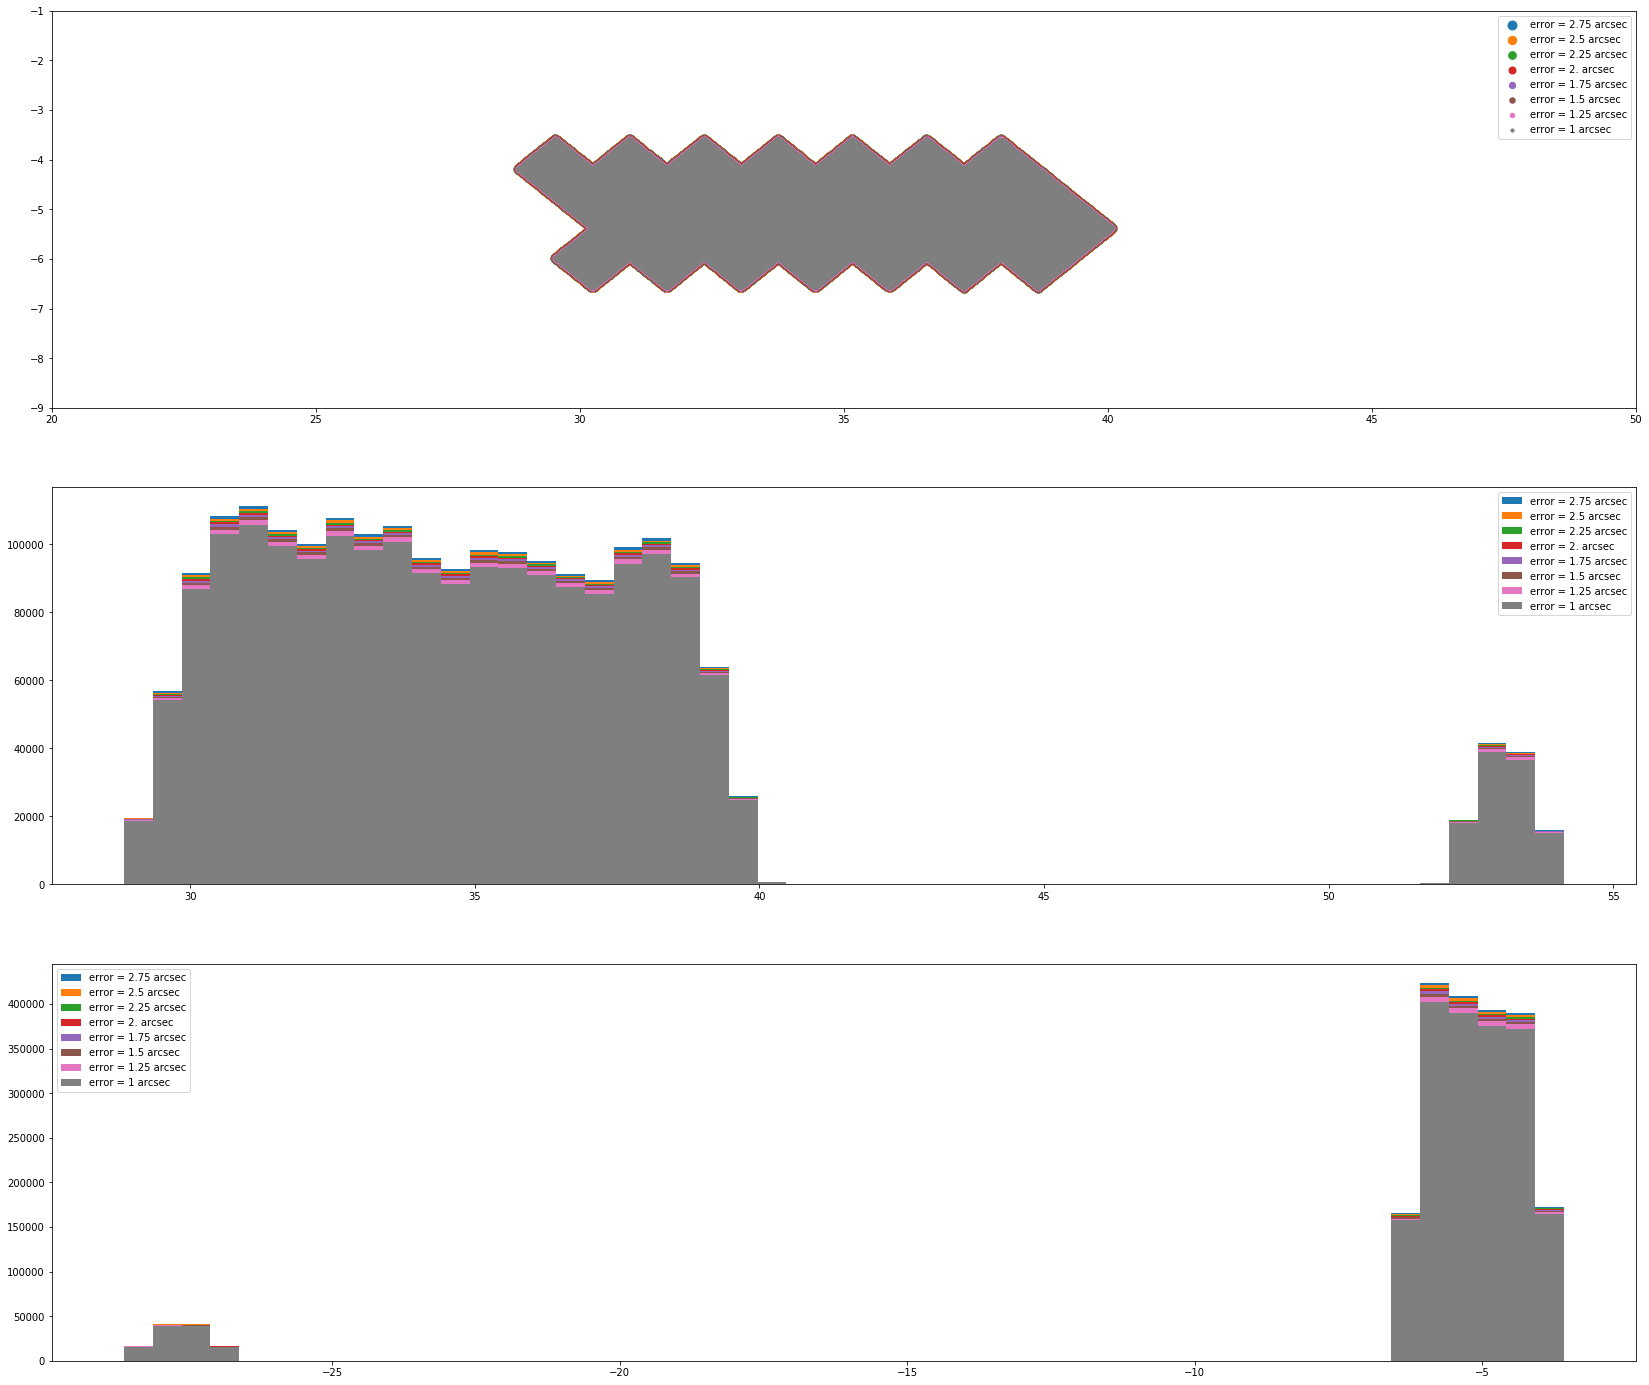

In [18]:
fig = plt.figure(figsize=(16,10))
grid = plt.GridSpec(3,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,:])
plt.xlim(20,50)
plt.ylim(-9,-1)
plt.scatter(tab8["RA"],tab8["DEC"],s = 80, label = "error = 2.75 arcsec")
plt.scatter(tab7["RA"],tab7["DEC"],s = 70, label = "error = 2.5 arcsec")
plt.scatter(tab6["RA"],tab6["DEC"],s = 60, label = "error = 2.25 arcsec")
plt.scatter(tab5["RA"],tab5["DEC"],s = 50, label = "error = 2. arcsec")
plt.scatter(tab4["RA"],tab4["DEC"],s = 40, label = "error = 1.75 arcsec")
plt.scatter(tab3["RA"],tab3["DEC"],s = 30, label = "error = 1.5 arcsec")
plt.scatter(tab2["RA"],tab2["DEC"],s = 20, label = "error = 1.25 arcsec")
plt.scatter(tab1["RA"],tab1["DEC"],s = 10, label = "error = 1 arcsec")

#plt.ylim(-4.6,-4.55)

plt.legend()
ax = plt.subplot(grid[1,:])

plt.hist(tab8["RA"],bins = 50, label = "error = 2.75 arcsec")
plt.hist(tab7["RA"],bins = 50, label = "error = 2.5 arcsec")
plt.hist(tab6["RA"],bins = 50, label = "error = 2.25 arcsec")
plt.hist(tab5["RA"],bins = 50, label = "error = 2. arcsec")
plt.hist(tab4["RA"],bins = 50, label = "error = 1.75 arcsec")
plt.hist(tab3["RA"],bins = 50, label = "error = 1.5 arcsec")
plt.hist(tab2["RA"],bins = 50, label = "error = 1.25 arcsec")
plt.hist(tab1["RA"],bins = 50, label = "error = 1 arcsec")



plt.legend()
#ax = plt.subplot(grid[1,1])
#plt.hist(des['RA'], label = 'DES.RA', color = 'blue', bins = 250)
#plt.xlim(0,50)
#plt.legend()
ax = plt.subplot(grid[2,:])

plt.hist(tab8["DEC"],bins = 50, label = "error = 2.75 arcsec")
plt.hist(tab7["DEC"],bins = 50, label = "error = 2.5 arcsec")
plt.hist(tab6["DEC"],bins = 50, label = "error = 2.25 arcsec")
plt.hist(tab5["DEC"],bins = 50, label = "error = 2. arcsec")
plt.hist(tab4["DEC"],bins = 50, label = "error = 1.75 arcsec")
plt.hist(tab3["DEC"],bins = 50, label = "error = 1.5 arcsec")
plt.hist(tab2["DEC"],bins = 50, label = "error = 1.25 arcsec")
plt.hist(tab1["DEC"],bins = 50, label = "error = 1 arcsec")

#plt.xlim(-10,-0)
#plt.hist(tab['DEC_1'], label = 'VVDS/VIPER x DES', color = 'orange', bins = 100)
#plt.hist(des['DEC'], label = 'DES', color = 'green', bins = 100)

plt.legend()
#ax = plt.subplot(grid[2,1])
#plt.hist(des['DEC'], label = 'DES.DEC', color = 'blue', bins = 100)

#plt.legend()
plt.savefig("taball.png",dpi = 300,bbox_inches = 'tight')

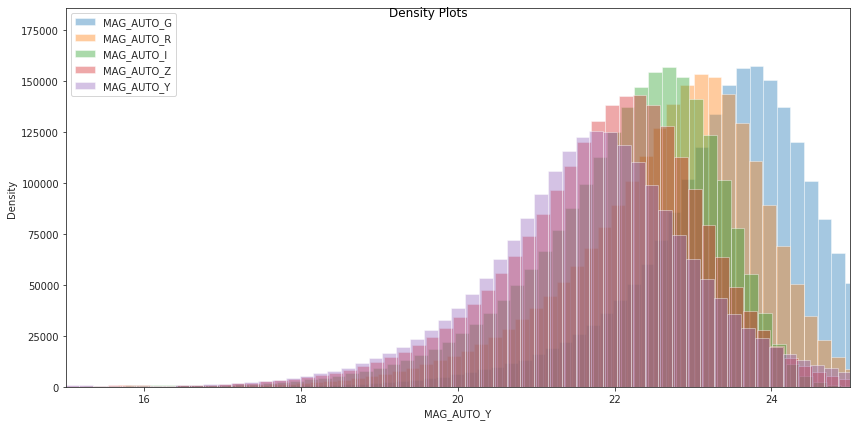

In [8]:
mag_feat = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(mag_feat)):
    sns.distplot(des[mag_feat[j]], hist = True,bins= 500 ,kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = mag_feat[j])
    plt.legend()
    plt.xlabel(mag_feat[j])
    plt.ylabel('Density')
plt.xlim(15,25)
plt.tight_layout()

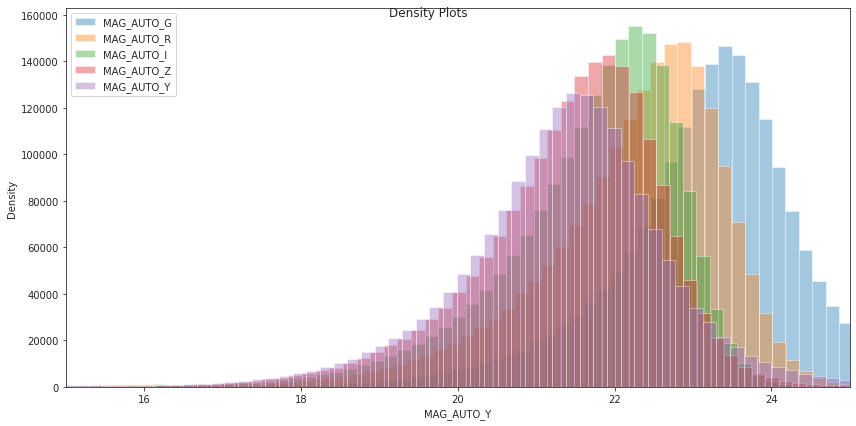

In [9]:
mag_feat = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(mag_feat)):
    sns.distplot(tab2[mag_feat[j]], hist = True,bins= 500 ,kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = mag_feat[j])
    plt.legend()
    plt.xlabel(mag_feat[j])
    plt.ylabel('Density')
plt.xlim(15,25)
plt.tight_layout()

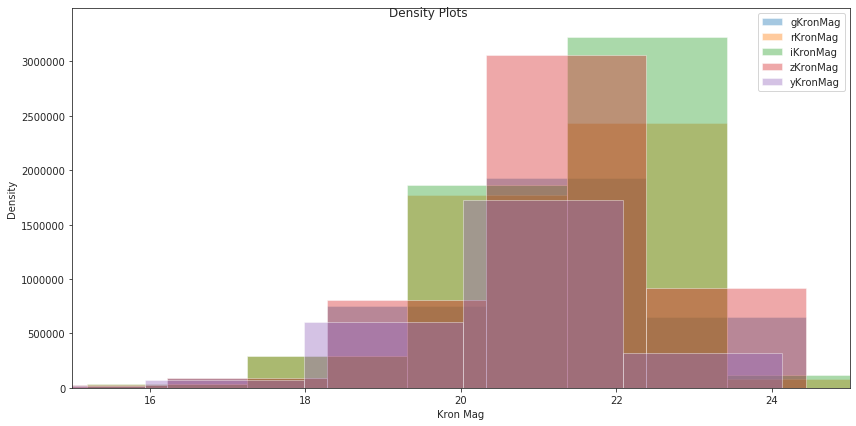

In [11]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(mag_ps1)):
    sns.distplot(tab2[tab2[mag_ps1[j]]!=-999][mag_ps1], bins = 500 ,hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = mag_ps1[j])
    plt.legend()
    plt.xlabel("Kron Mag")
    plt.ylabel('Density')
plt.xlim(15,25)
plt.tight_layout()

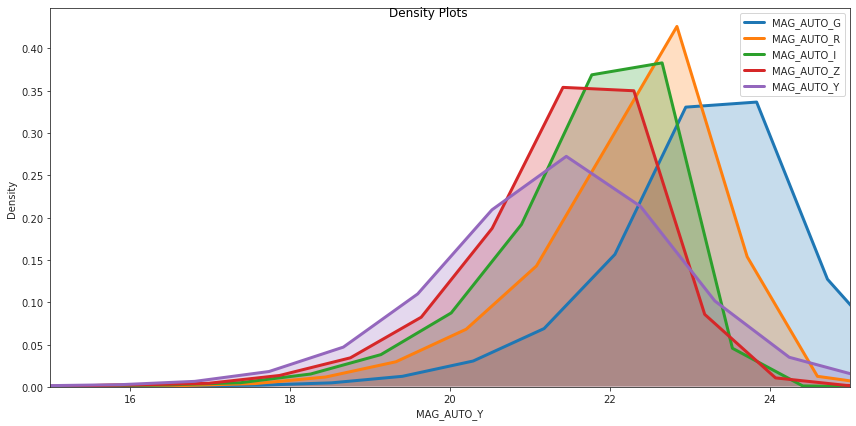

In [15]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(mag_feat)):
    sns.distplot(tab2[mag_feat[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = mag_feat[j])
    plt.legend()
    plt.xlabel(mag_feat[j])
    plt.ylabel('Density')
plt.xlim(15,25)
plt.tight_layout()

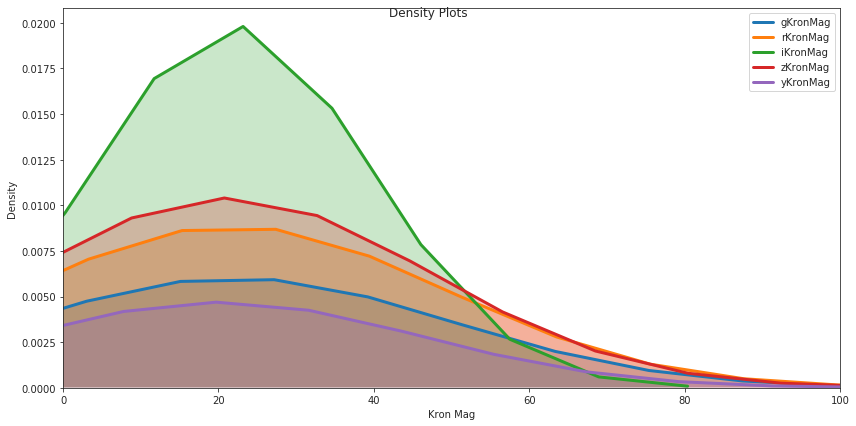

In [13]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(mag_ps1)):
    sns.distplot(tab2[mag_ps1[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = mag_ps1[j])
    plt.legend()
    plt.xlabel("Kron Mag")
    plt.ylabel('Density')
plt.xlim(0,100)
plt.tight_layout()

Extract the **color** of the ps1 

In [ ]:
features1 = np.zeros(shape=(len(tab1), 4))
features2 = np.zeros(shape=(len(tab1), 4))
features3 = np.zeros(shape=(len(tab1), 4))
features4 = np.zeros(shape=(len(tab1), 4))
features5 = np.zeros(shape=(len(tab1), 4))
features6 = np.zeros(shape=(len(tab1), 4))
features7 = np.zeros(shape=(len(tab1), 4))
features8 = np.zeros(shape=(len(tab1), 4))

for i in range(len(mag_ps1)):
    try:
        features1[:,i] = tab1[mag_ps1[i]]-tab1[mag_ps1[i+1]]
        features2[:,i] = tab2[mag_ps1[i]]-tab2[mag_ps1[i+1]]
        features3[:,i] = tab3[mag_ps1[i]]-tab3[mag_ps1[i+1]]
        features4[:,i] = tab4[mag_ps1[i]]-tab4[mag_ps1[i+1]]
        features5[:,i] = tab5[mag_ps1[i]]-tab5[mag_ps1[i+1]]
        features6[:,i] = tab6[mag_ps1[i]]-tab6[mag_ps1[i+1]]
        features7[:,i] = tab7[mag_ps1[i]]-tab7[mag_ps1[i+1]]
        features8[:,i] = tab8[mag_ps1[i]]-tab8[mag_ps1[i+1]]
        
    except:
        pass

**Compute the completness of the catalogs**

(15, 40)

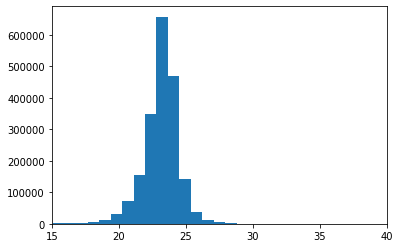

In [24]:
plt.hist(tab1['MAG_AUTO_G'],bins = 100)
plt.xlim(15,40)

(15, 40)

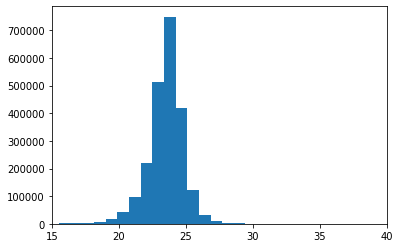

In [25]:
plt.hist(des['MAG_AUTO_G'],bins = 100)
plt.xlim(15,40)

In [20]:
count1, n1 = np.histogram(tab1['MAG_AUTO_R'],bins = np.linspace(0,30,100)) 
count2, n2 = np.histogram(tab4['MAG_AUTO_R'],bins = np.linspace(0,30,100))
count3, n3 = np.histogram(tab8["MAG_AUTO_R"],bins = np.linspace(0,30,100))
count4, n4 = np.histogram(des['MAG_AUTO_R'],bins = np.linspace(0,30,100))

In [22]:
count1, n1 = np.histogram(tab1['MAG_AUTO_G'],bins = np.linspace(0,30,100)) 
count4, n4 = np.histogram(des['MAG_AUTO_G'],bins = np.linspace(0,30,100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<BarContainer object of 99 artists>

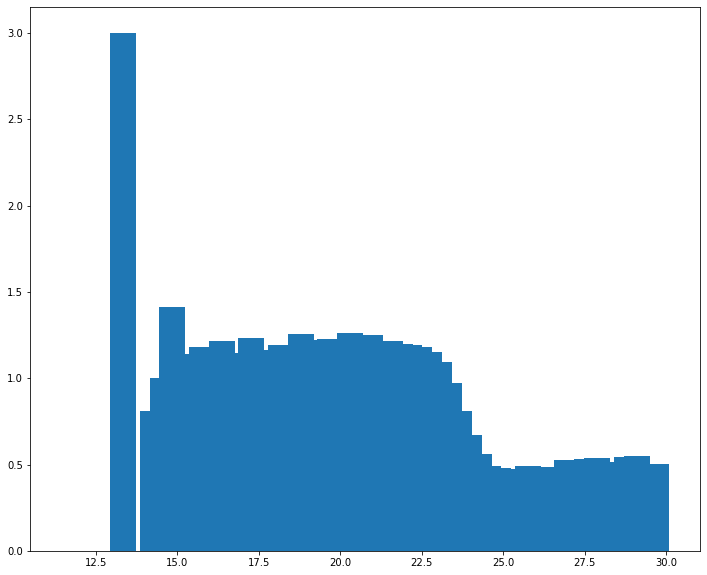

In [23]:
plt.figure(figsize=(12,10))
plt.bar(n1[:-1],(count1/count4),label = "1 arc sec dist")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


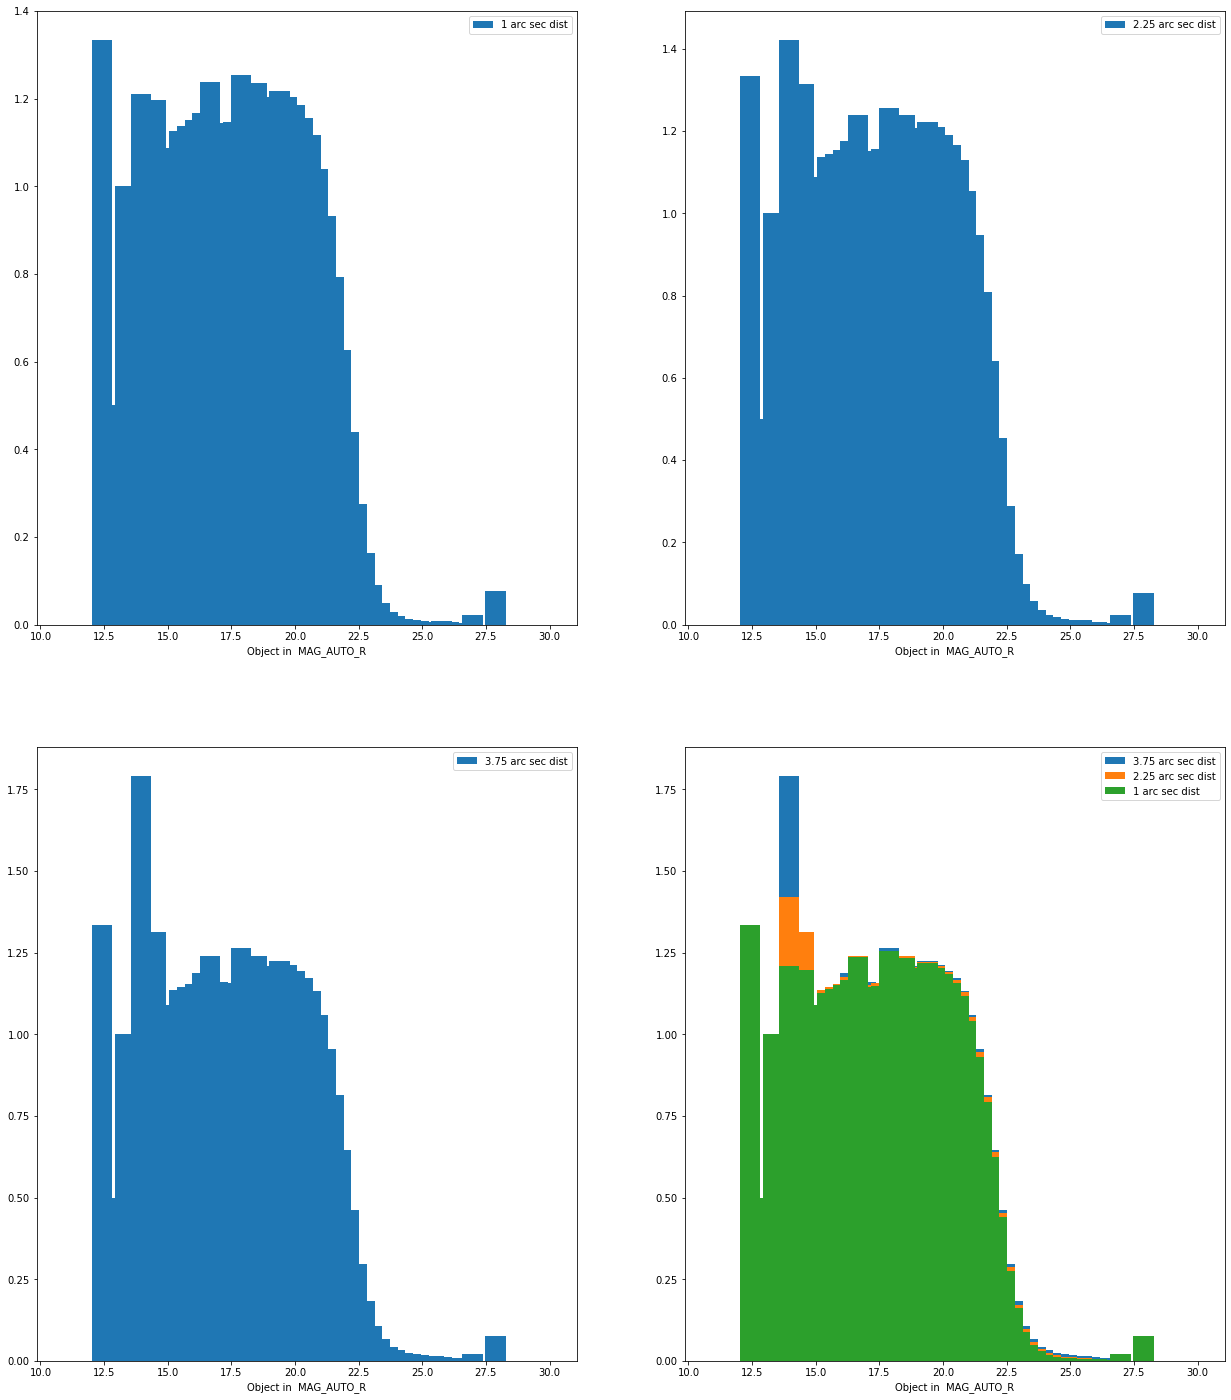

In [21]:
fig = plt.figure(figsize=(12,10))
grid = plt.GridSpec(2,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.bar(n1[:-1],(count1/count4),label = "1 arc sec dist")
plt.xlabel("Object in  MAG_AUTO_R")
plt.legend()

ax = plt.subplot(grid[0,1])
plt.bar(n2[:-1],(count2/count4),label = "2.25 arc sec dist")
plt.xlabel("Object in  MAG_AUTO_R")
plt.legend()

ax = plt.subplot(grid[1,0])
plt.bar(n3[:-1],(count3/count4),label = "3.75 arc sec dist")
plt.xlabel("Object in  MAG_AUTO_R")
plt.legend()


ax = plt.subplot(grid[1,1])
plt.bar(n3[:-1],(count3/count4),label = "3.75 arc sec dist")
plt.bar(n2[:-1],(count2/count4),label = "2.25 arc sec dist")
plt.bar(n1[:-1],(count1/count4),label = "1 arc sec dist")
plt.xlabel("Object in  MAG_AUTO_R")
plt.legend()


plt.savefig("galaxycountDES.png",dpi = 300,bbox_inches = 'tight')

In [22]:
countkron1 , nkron1 = np.histogram(tab1['gKronMag'],bins = np.linspace(0,30,100)) 
countkron2 , nkron2 = np.histogram(tab4['gKronMag'],bins = np.linspace(0,30,100)) 
countkron3 , nkron3 = np.histogram(tab8['gKronMag'],bins = np.linspace(0,30,100)) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


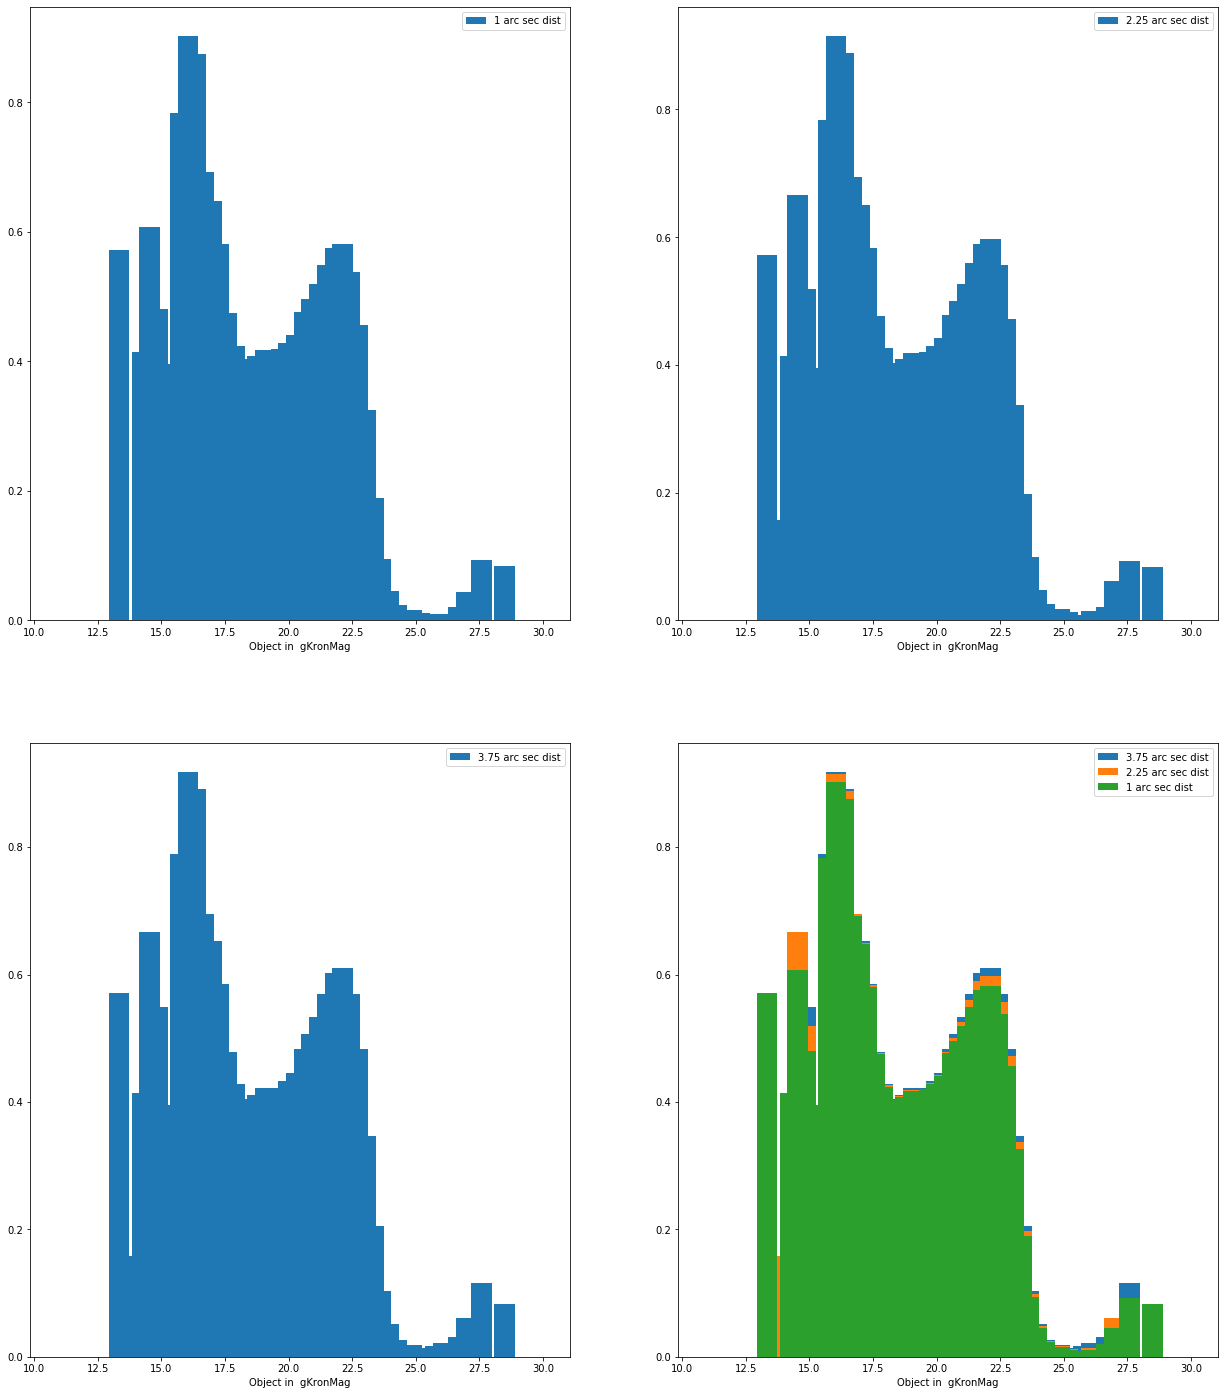

In [23]:
fig = plt.figure(figsize=(12,10))
grid = plt.GridSpec(2,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.bar(nkron1[:-1],(countkron1/count4),label = "1 arc sec dist")
plt.xlabel("Object in  gKronMag")
plt.legend()

ax = plt.subplot(grid[0,1])
plt.bar(nkron2[:-1],(countkron2/count4),label = "2.25 arc sec dist")
plt.xlabel("Object in  gKronMag")
plt.legend()

ax = plt.subplot(grid[1,0])
plt.bar(nkron3[:-1],(countkron3/count4),label = "3.75 arc sec dist")
plt.xlabel("Object in  gKronMag")
plt.legend()

ax = plt.subplot(grid[1,1])
plt.bar(nkron3[:-1],(countkron3/count4),label = "3.75 arc sec dist")
plt.bar(nkron2[:-1],(countkron2/count4),label = "2.25 arc sec dist")
plt.bar(nkron1[:-1],(countkron1/count4),label = "1 arc sec dist")
plt.xlabel("Object in  gKronMag")
plt.legend()


plt.savefig("galaxycountPS.png",dpi = 300,bbox_inches = 'tight')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


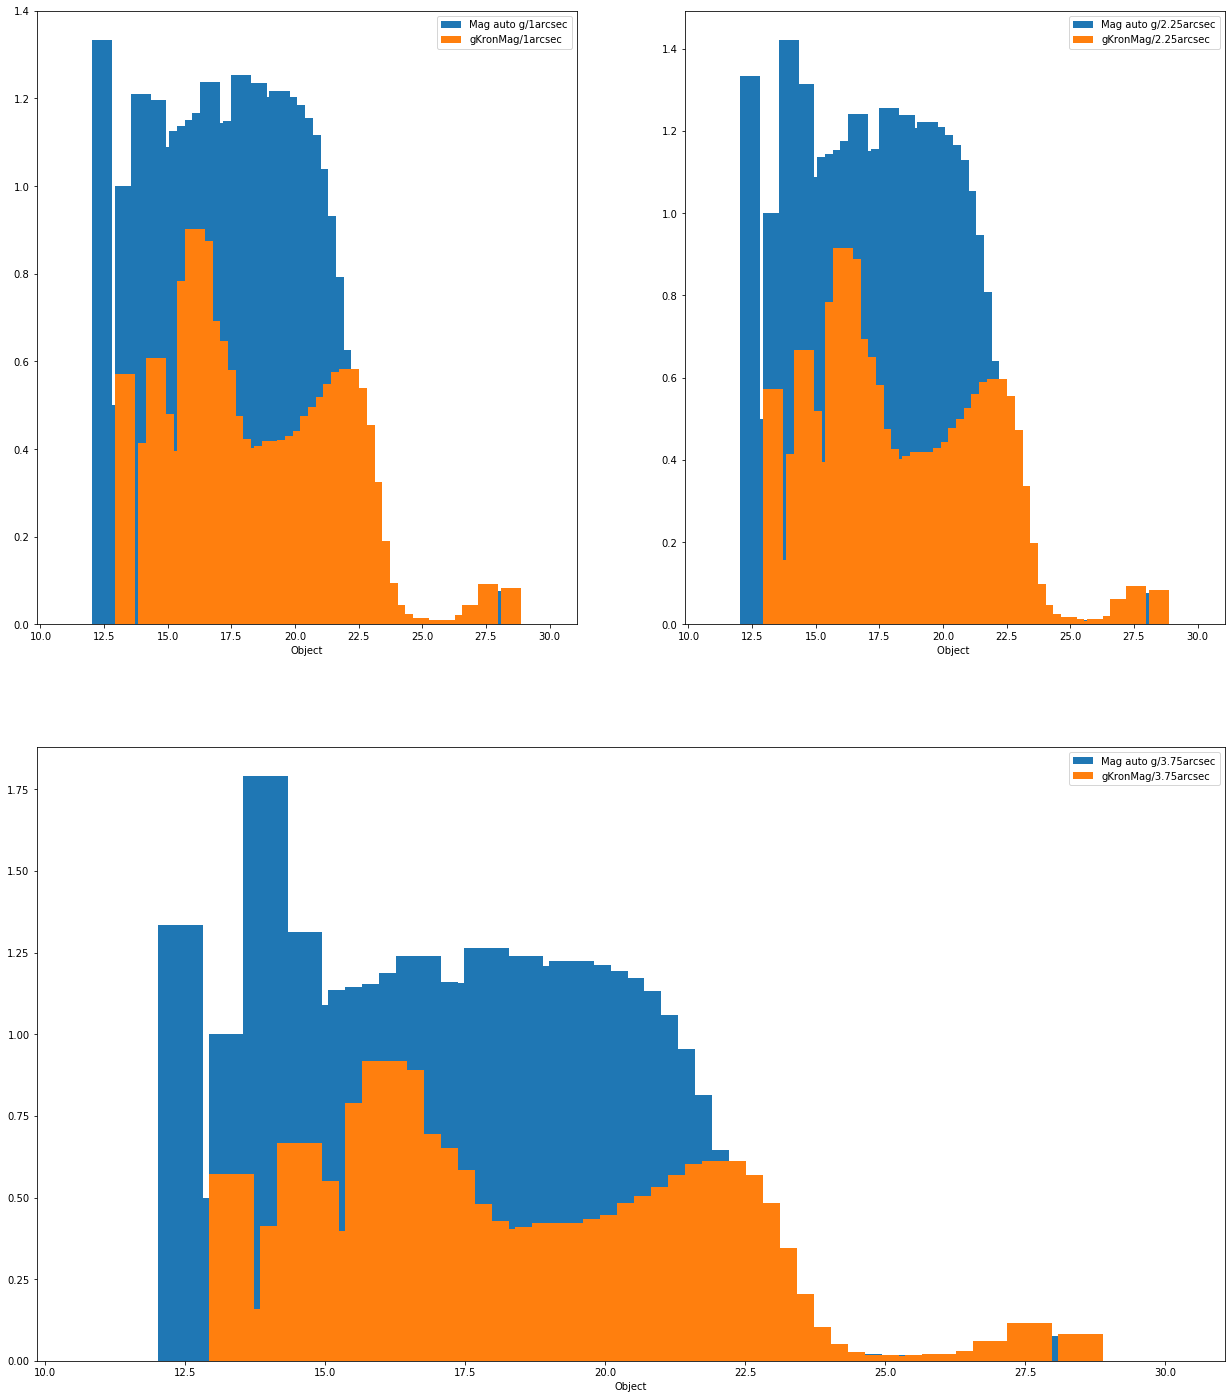

In [24]:
fig = plt.figure(figsize=(12,10))
grid = plt.GridSpec(2,2, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
plt.bar(n1[:-1],(count1/count4),label = "Mag auto g/1arcsec")
plt.bar(nkron1[:-1],(countkron1/count4),label = "gKronMag/1arcsec")
plt.xlabel("Object")
plt.legend()

ax = plt.subplot(grid[0,1])
plt.bar(n2[:-1],(count2/count4),label = "Mag auto g/2.25arcsec")
plt.bar(nkron2[:-1],(countkron2/count4),label = "gKronMag/2.25arcsec")
plt.xlabel("Object ")
plt.legend()

ax = plt.subplot(grid[1,:])
plt.bar(n3[:-1],(count3/count4),label = "Mag auto g/3.75arcsec")
plt.bar(nkron3[:-1],(countkron3/count4),label = "gKronMag/3.75arcsec")
plt.xlabel("Object")
plt.legend()

plt.savefig("galaxycountboth.png",dpi = 300,bbox_inches = 'tight')

In [9]:
clean_tab(tab1,"gKronMag",-999)
clean_tab(tab4,"gKronMag",-999)
clean_tab(tab8,"gKronMag",-999)


In [14]:
clean_tab(tab8,mag_feat[0],99)
clean_tab(tab4,mag_feat[0],99)
clean_tab(tab1,mag_feat[0],99)

In [ ]:
#for j in range(len(mag_feat)):
plt.figure(figsize=(12,8))
plt.scatter(tab8[mag_feat[0]],tab8[mag_ps1[0]],s = 50,label = "3.75 arcsec dist")
plt.scatter(tab4[mag_feat[0]],tab4[mag_ps1[0]],s = 10,label = "2.25 arcsec dist")
plt.scatter(tab1[mag_feat[0]],tab1[mag_ps1[0]],s = 3,label = "1 arcsec dist")
plt.legend()
plt.xlabel(mag_feat[0])
plt.ylabel(mag_ps1[0])
#plt.xlim(15,25)
plt.tight_layout()
plt.savefig("CorrelationG.png",dpi = 300,bbox_inches = 'tight')

Plot of the Mean Chip Photometric

Text(0, 0.5, 'PSF kron mag')

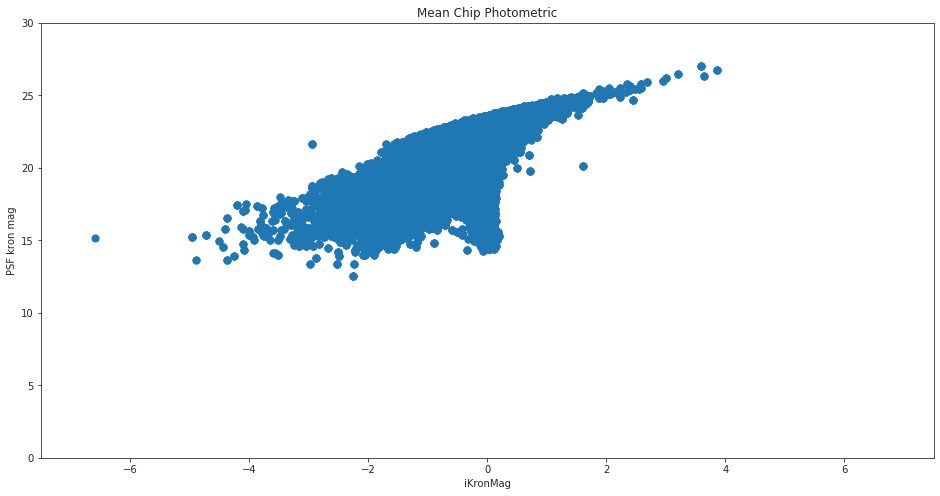

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(tab1[mag_ps1[2]]-tab1["iPSFMag"],tab1[mag_ps1[2]],s = 50)
plt.xlim(-7.5,7.5)
plt.ylim(0,30)
plt.title("Mean Chip Photometric")
plt.xlabel(maag_ps1[2])
plt.ylabel("PSF kron mag")

KeyboardInterrupt: 

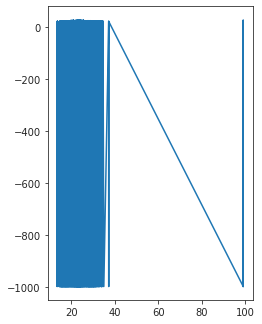

In [47]:
fig = plt.figure(figsize=(12,10))
grid = plt.GridSpec(4,5, top = 2,right = 1.5)
ax = plt.subplot(grid[0,0])
for i in range(len(mag_feat)):
    plt.plot(tab1[mag_feat[i]],tab1[mag_ps1[i]],label = mag_feat[i]+"x"+mag_ps1[i])
    plt.plot(tab1[mag_feat[i]],tab1[tab1[mag_ps1[i]]!=-999][mag_ps1[i]],label = mag_feat[i]+"x"+mag_ps1[i])

#plt.title("Mean Chip Photometric")
#plt.xlabel("Mag auto")
#plt.ylabel(" Kron auto")
plt.legend()

ax = plt.subplot(grid[0,1])
for i in range(len(mag_feat)):
    plt.plot(tab2[mag_feat[i]],tab2[mag_ps1[i]],label = mag_feat[i]+"x"+mag_ps1[i])
#plt.title("Mean Chip Photometric")
plt.xlabel("Mag auto")
plt.ylabel(" Kron auto")
plt.legend()

ax = plt.subplot(grid[1,0])
for i in range(len(mag_feat)):
    plt.plot(tab3[mag_feat[i]],tab3[mag_ps1[i]],label = mag_feat[i]+"x"+mag_ps1[i])
#plt.title("Mean Chip Photometric")
plt.xlabel("Mag auto")
plt.ylabel("Kron auto")
plt.legend()

ax = plt.subplot(grid[1,1])

for i in range(len(mag_feat)):
    plt.plot(tab4[mag_feat[i]],tab4[mag_ps1[i]],label = mag_feat[i]+"x"+mag_ps1[i])
#plt.title("Mean Chip Photometric")
plt.xlabel("Mag auto")
plt.ylabel("Kron auto")
plt.legend()

ax = plt.subplot(grid[2,0])

for i in range(len(mag_feat)):
    plt.plot(tab4[mag_feat[i]],tab4[mag_ps1[i]],label = mag_feat[i]+"x"+mag_ps1[i])
#plt.title("Mean Chip Photometric")
plt.xlabel("Mag auto")
plt.ylabel("Kron auto")
plt.legend()

